In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np

districts = ["DSSennar", "Egypt", "Gezira", "Hassanab", "Taminiat", "USSennar"]
to_be_removed = ["Girba", "Jebel"]

nu_of_days_per_month = np.array([
            31,  # January
            28,  # February (non-leap year)
            31,  # March
            30,  # April
            31,  # May
            30,  # June
            31,  # July
            31,  # August
            30,  # September
            31,  # October
            30,  # November
            31,  # December
        ])

In [3]:
def generate_future_data(data, years, growth_coefficient, lambda_std):
    over_years = []
    for i in range(years):
        data_with_coef = np.array(data) * ((1 + growth_coefficient) ** (8 + i))
        
        noise = np.random.normal(0, lambda_std, 12 )
        
        noise_vals = noise * data_with_coef
        
        data_with_coef += noise_vals
        
        over_years = np.append(over_years, data_with_coef)
    return over_years

def convert_to_ms(data):
    data = np.array(data)
    data *= 1000000 / (nu_of_days_per_month * 86400.0)
    return data

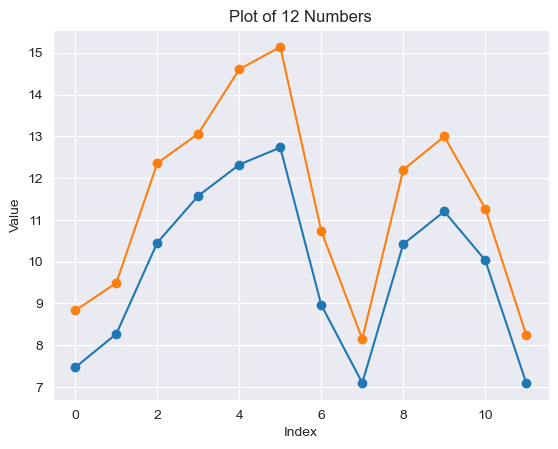

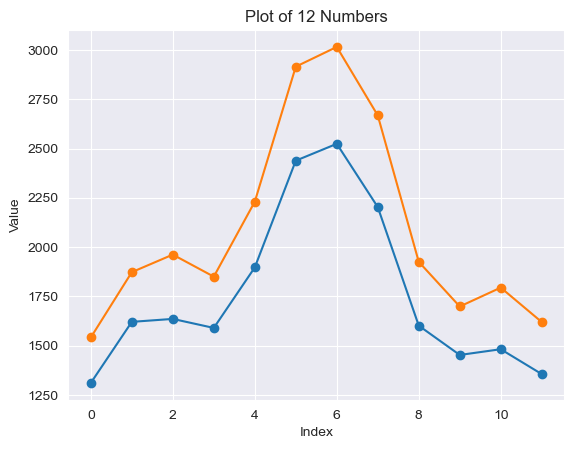

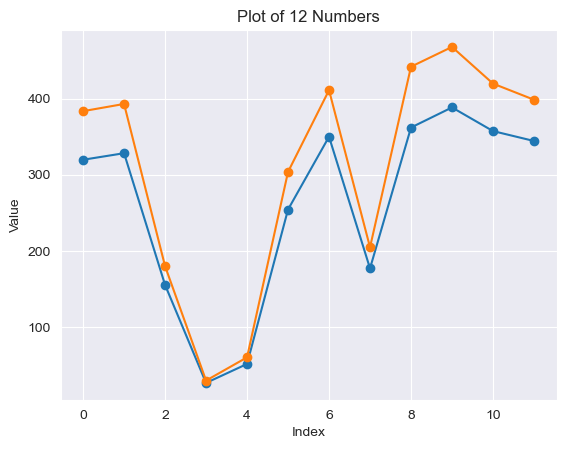

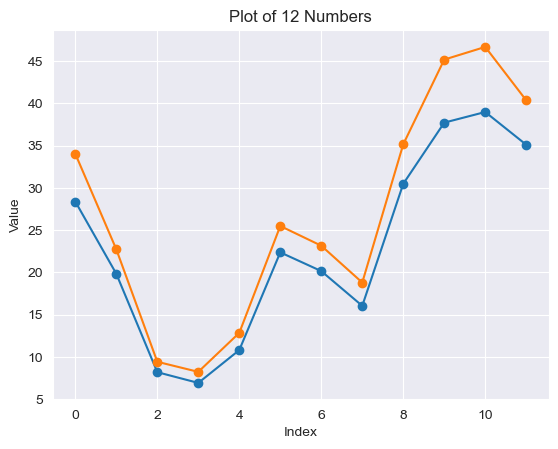

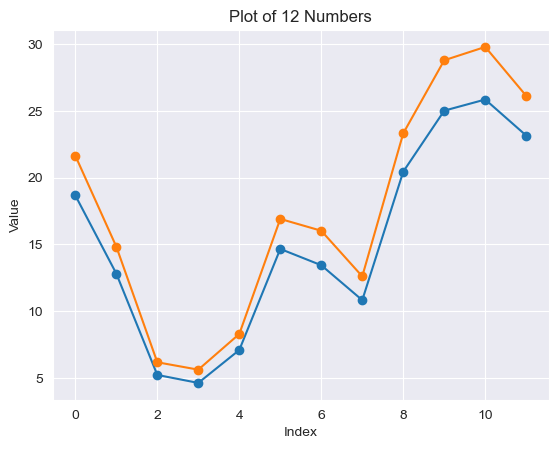

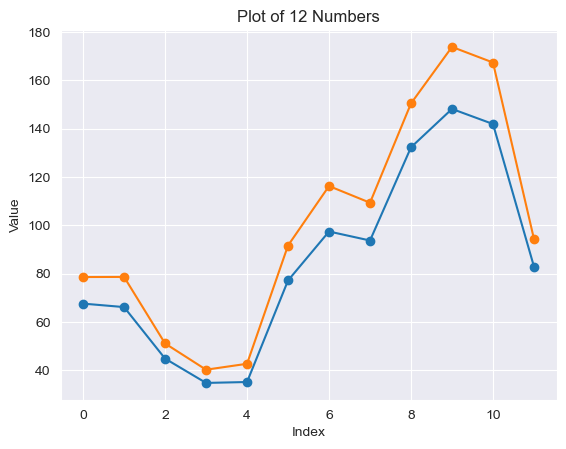

In [4]:
for district in districts:
    path = os.path.join(f"IrrDemand{district}.txt")
    if os.path.exists(path):
        sum25 = 0
        sum27 = 0
        with open(os.path.join(path), 'r') as f:
            lines = f.readlines()
            # Extract the primary information, which are lines after the first three lines
            data = [float(line.strip()) for line in lines]
            data = convert_to_ms(data)
            new_data = generate_future_data(data, 1, 0.02, 0.02)
            plt.plot(range(0, 12), data, new_data, marker='o', linestyle='-')
            plt.title('Plot of 12 Numbers')
            plt.xlabel('Index')
            plt.ylabel('Value')
            plt.grid(True)
            plt.show()

In [89]:
for district in districts:
    path = os.path.join(f"IrrDemand{district}.txt")
    if os.path.exists(path):
        with open(os.path.join(path), 'r') as f:
            lines = f.readlines()
            # Extract the primary information, which are lines after the first three lines
            data = [float(line.strip()) for line in lines]
            data = convert_to_ms(data)
            with open(f"Demand{district}.txt", "w") as f:
                for x in data:
                    f.write(f"{x}\n")